# Fuel economy between different car manufacturers (2023)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df =  pd.read_csv('Dataset.csv')
#year = input("What year do you want to analyse? ")
year = 2023
df2 = df[df['Model Year'] == year]

### 1. Find the car manufacturer, which contains most quantity of car models.

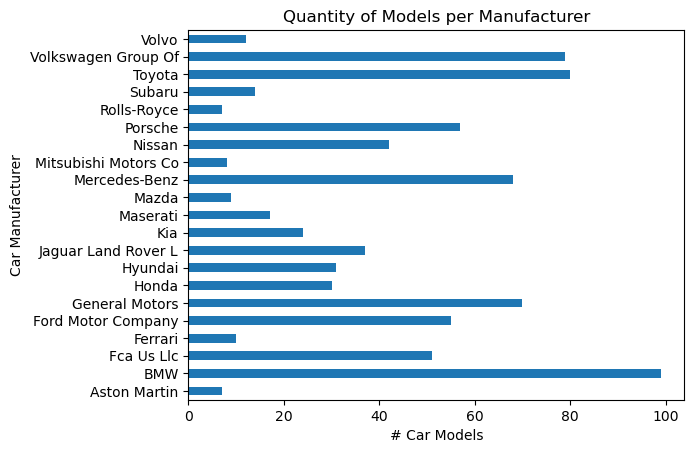

In [2]:

df2.groupby('Mfr Name')['Carline'].nunique().plot(kind ='barh')
plt.title("Quantity of Models per Manufacturer")
plt.ylabel("Car Manufacturer")
plt.xlabel("# Car Models")
plt.show()

The manufacturer with the most car models is BMW.

### 2. Find the top average fuel economy for the city and highway driving for 2023.

In [5]:

df2['average FE'] = df2[['City FE', 'Highway FE']].mean(axis=1)
max =df2['average FE'].max()
df2['fullline'] = df2['Division'] + ' ' + df2['Carline'].str.title()
name = df2['fullline'][df2['average FE'] == max].values[0]
topFEdict = {year: {'Car Model': name, 'Average Fuel Economy': max}}
print(topFEdict)

{2023: {'Car Model': 'Toyota Prius', 'Average Fuel Economy': 56.5}}


/var/folders/0p/p6l2y11128s2vm0w1lqgw5wm0000gn/T/ipykernel_14722/207737138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['average FE'] = df2[['City FE', 'Highway FE']].mean(axis=1)
/var/folders/0p/p6l2y11128s2vm0w1lqgw5wm0000gn/T/ipykernel_14722/207737138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fullline'] = df2['Division'] + ' ' + df2['Carline'].str.title()


### 3. Find good and bad average fuel economy cars from all transmission types in 2023.

/var/folders/0p/p6l2y11128s2vm0w1lqgw5wm0000gn/T/ipykernel_14722/228620821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Transmission Description'] = df2['Transmission Description'].str.split('(', expand=True)[0]


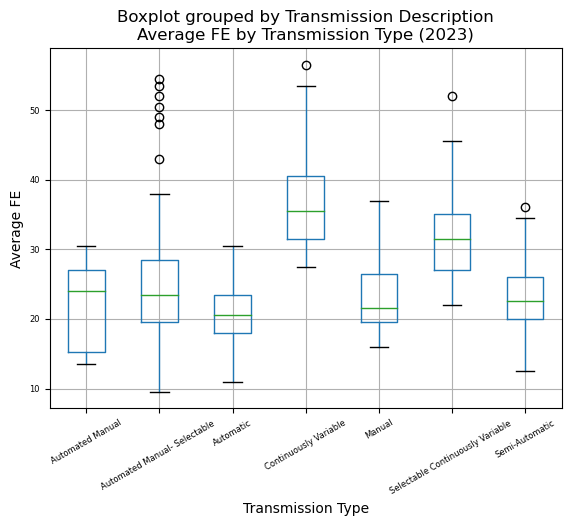

In [6]:

df2['Transmission Description'] = df2['Transmission Description'].str.split('(', expand=True)[0]
df2.boxplot(column=['average FE'], by ='Transmission Description', rot= 30, fontsize=6)
plt.title(f"Average FE by Transmission Type ({year})")
plt.xlabel("Transmission Type")
plt.ylabel("Average FE")
plt.show()

### 4. Find car manufacturers, which have 4WD (4-wheel drive) and 2WD (2-wheel drive) with engine power is more than 3.5.

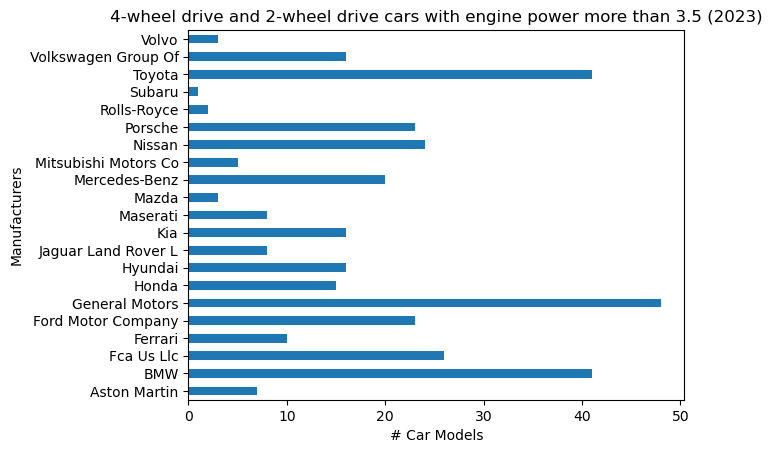

In [7]:

res_df = df2[(df2["Drive Desc"] == '2-Wheel Drive, Rear') | (df2["Drive Desc"] == '2-Wheel Drive, Front') | (df2["Drive Desc"] == '4-Wheel Drive') & (df2['Engine Displacement'] > 3.5)]
grouped =res_df.groupby('Mfr Name')
grouped['Carline'].nunique().plot(kind ='barh')
plt.title(f"4-wheel drive and 2-wheel drive cars with engine power more than 3.5 ({year})")
plt.ylabel("Manufacturers")
plt.xlabel("# Car Models")
plt.show()

### 5. Is there a relationship between Combined FE and Combined CO2 in 2023?

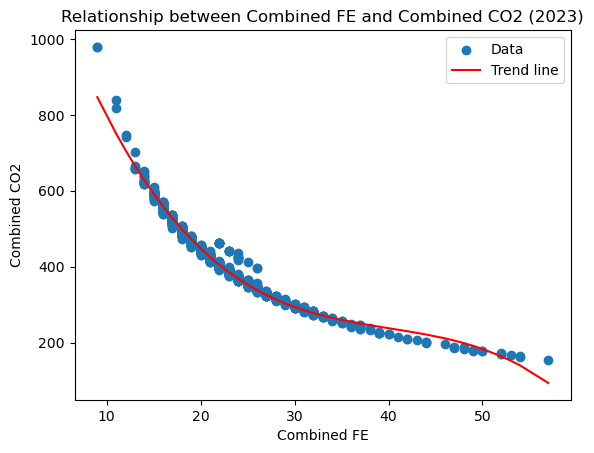

In [8]:

x = df2["Combined FE"]
y = df2["Combined CO2"]

plt.scatter(x, y, label='Data')
plt.title(f"Relationship between Combined FE and Combined CO2 ({year})")
plt.xlabel("Combined FE")
plt.ylabel("Combined CO2")

coef = np.polyfit(x, y, 3)
p = np.poly1d(coef)

sorted = np.sort(x)
plt.plot(sorted, p(sorted), color='red', label='Trend line')
plt.legend()
plt.show()

### 6. How much CO2 on average is emitted for each car type?

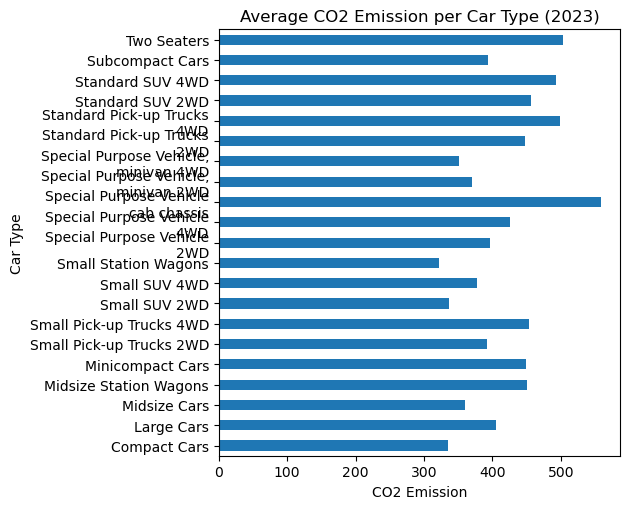

In [9]:

dfCO2 = df2.groupby('Carline Class Desc')['Combined CO2'].mean()
dfCO2.plot(kind='barh')
plt.tight_layout()
plt.ylabel("Car Type")
plt.xlabel("CO2 Emission")
plt.title(f"Average CO2 Emission per Car Type ({year})")
plt.show()

### 7a. How much CO2 on average is emitted for each car manufacturer?

### 7b. What's the average rating for each car manufacturer?

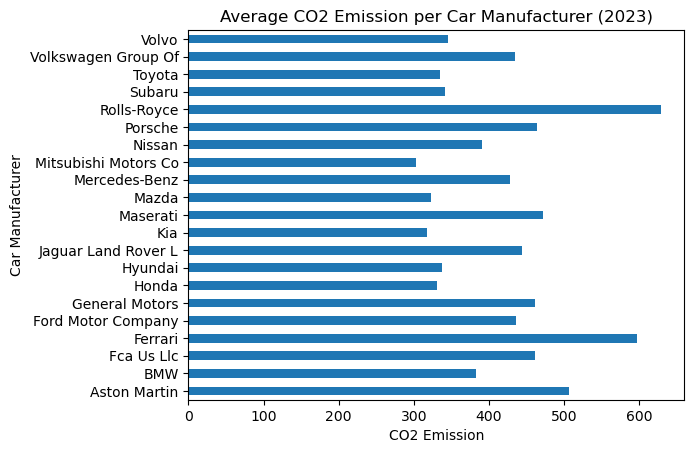

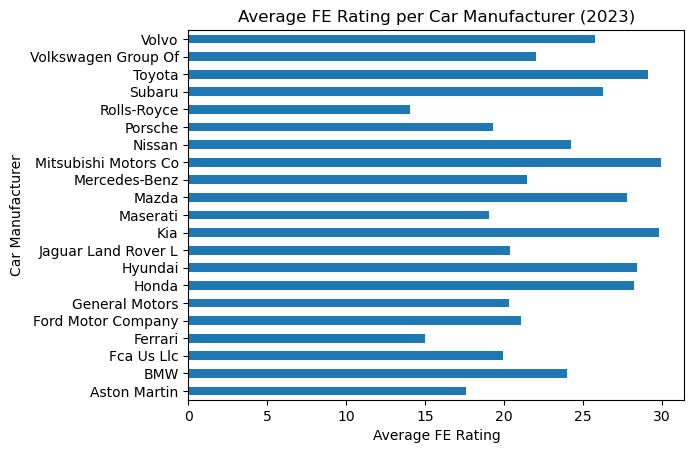

In [10]:

dfCO2 = df2.groupby('Mfr Name')['Combined CO2'].mean().plot(kind='barh')
plt.ylabel("Car Manufacturer")
plt.xlabel("CO2 Emission")
plt.title(f"Average CO2 Emission per Car Manufacturer ({year})")
plt.show()

dfCO2 = df2.groupby('Mfr Name')['Combined FE'].mean().plot(kind='barh')
plt.ylabel("Car Manufacturer")
plt.xlabel("Average FE Rating")
plt.title(f"Average FE Rating per Car Manufacturer ({year})")
plt.show()

### 8. Is there a relationship between Engine Power and FE rating?

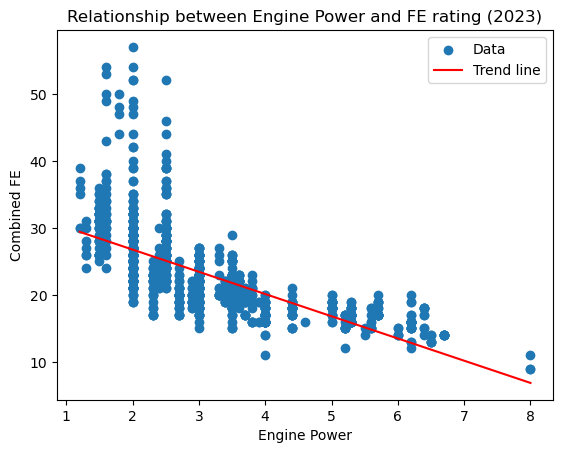

In [11]:

x = df2["Engine Displacement"]
y = df2["Combined FE"]

plt.scatter(x, y, label='Data')
plt.title(f"Relationship between Engine Power and FE rating ({year})")
plt.xlabel("Engine Power")
plt.ylabel("Combined FE")

coef = np.polyfit(x, y, 1)
p = np.poly1d(coef)

sorted = np.sort(x)
plt.plot(sorted, p(sorted), color='red', label='Trend line')
plt.legend()
plt.show()

### 9. Is there a relationship between Engine Power and # Cylinders?

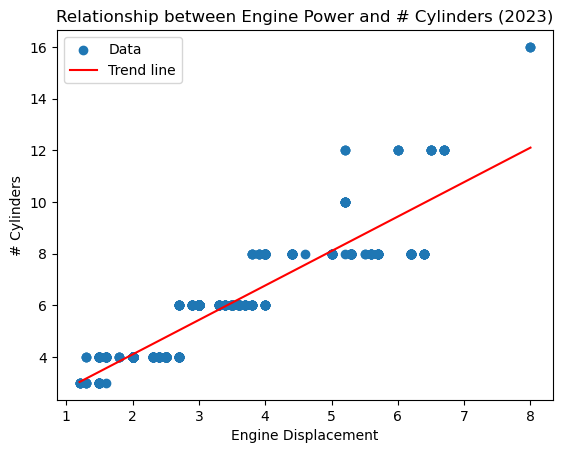

In [12]:

x = df2["Engine Displacement"]
y = df2["# Cylinders"]

plt.scatter(x, y, label='Data')
plt.title(f"Relationship between Engine Power and # Cylinders ({year})")
plt.xlabel("Engine Displacement")
plt.ylabel("# Cylinders")

coef = np.polyfit(x, y, 1)
p = np.poly1d(coef)

sorted = np.sort(x)
plt.plot(sorted, p(sorted), color='red', label='Trend line')
plt.legend()
plt.show()